# IBM Ponder This - December 2024

## Problem Statement

Denote by $\omega_d(n)$ the size of the set of all natural numbers between 1 and $n$ that have the digit $d$ in their usual decimal representation. For example, $\omega_1(1456)=728$ and $\omega_7(1456)=352$.

We see that for $n=1456$, we have $\frac{\omega_1(n)}{n} = \frac{1}{2}$, i.e., exactly 50% of the numbers up to 1456 contain the digit 1. For $d=7$, we have $\frac{\omega_7(n)}{n} = \frac{22}{91}$.

Your goal: For each $d$ between 1 and 9, find the maximum value of $n$ for which $\frac{\omega_d(n)}{n} = \frac{1}{2}$.

An optional goal: Find a simple formula $f(d)$ giving those maximum values for as many values of $d$ as possible.

A bonus "*" will be given for finding the maximum value of $n$ for which $\frac{\omega_1(n)}{n} = \frac{3}{4}$ (i.e., only solve the case $d=1$. but for $\frac{3}{4}$ this time).

## Solution

A first observation is that the probability of finding a specific digit in a number grows as the number of digits in the number grows. Indeed, we $n$ tends to infinity, the probability of finding a specific digit tends to 1. A second observation is that the higher the digit, the longer it will take to find the solution. 

### Base Problem

As a first step we can try to detect a pattern. We plot the proportion of digits containing the digit 9 for the first 100 million numbers. Based on the pattern and the previous two observations, we can safely assume that 100 million is an upper bound. Therefore, we can simply obtain the solution by brute-force.

We also notice that the function $f(n) = 1062880d + 2(d - 1)$ gives the result for $1 \leq d \leq 6$.

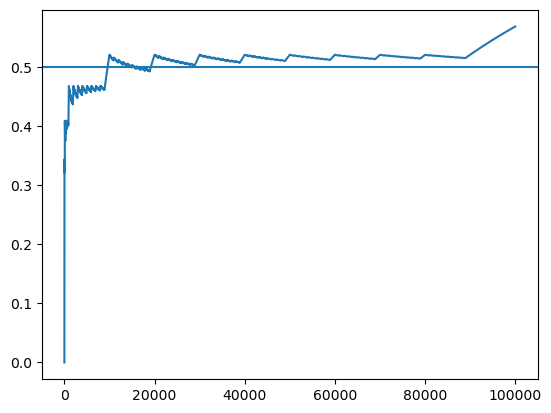

In [1]:
import numpy as np
import matplotlib.pyplot as plt

digit = '9'

cnt = 0
total = 0
res = []
for i in range(1, 100000000):
    if digit in str(i):
        cnt += 1
    total += 1
    res.append(cnt / total)

plt.plot(res[::1000])
plt.axhline(0.5)

In [2]:
for digit in range(1, 10):
    digit = str(digit)
    cnt = 0
    total = 0
    res = 0
    for i in range(1, 100000000):
        if digit in str(i):
            cnt += 1
        total += 1
        if cnt / total == 1 / 2:
            res = i
    print(digit, res)

1 1062880
2 2125762
3 3188644
4 4251526
5 5314408
6 6377290
7 17006110
8 18068992
9 19131874


### Bonus Problem

For the bonus problem, we need a smarter approach. An observation is that for numbers with a given number of digits, the lowest ratio is reached when all the digits are 9. We can use this to property to set an upper bound on the number of digits. Whenever we find that the $k$-digit number containing only the digit 9 has a ratio greater than 0.75, we know that all the numbers with $k$ or more digits will have a ratio greater than 0.75.

We can first create an efficient function to compute the ratio. This can be done with dynamic programming. 

Then, we compute the ratio for all $k$-digit numbers containing only 9 until we find the first one with a ratio greater than 0.75. This $k$ is the maximum number of digit in the answer. We know that a $(k - 1)$-digit number with all 9 has a lower ratio and a $k$-digit number has a higher ratio. Based on the previous observations, it means the first digit of the solution must be a 1 (as otherwise, the ratio for the number with $k-1$ digit would be below 0.75).

Now, going from left to right, we increase the digit to the maximum such that the ratio is at most 0.75. When we reach 0.75, it means we have found the answer.

In [3]:
def count_numbers_with_digit_one(n):
    # Convert number to string to easily access each digit
    str_n = str(n)
    length = len(str_n)

    # dp[pos][smaller][count] where:
    # - pos is the current position in the number we are filling
    # - smaller is a flag indicating if the current number we are forming is already smaller than n
    # - count is the count of numbers formed with at least one '1'
    dp = [[[None for _ in range(2)] for _ in range(2)] for _ in range(length + 1)]

    def digit_dp(pos, smaller, seen_one):
        # Base case: If we are past the last digit
        if pos == length:
            return 1 if seen_one else 0

        # If already computed, return the result from dp table
        if dp[pos][smaller][seen_one] is not None:
            return dp[pos][smaller][seen_one]

        # Determine the limits of what digit we can place
        limit = int(str_n[pos]) if not smaller else 9
        result = 0

        # Try placing each digit from 0 to the limit at current position
        for digit in range(0, limit + 1):
            # If digit is 0 and we have already seen a '1', it still counts
            result += digit_dp(pos + 1,
                               smaller or digit < limit,
                               seen_one or digit == 1)

        # Store the computed result in dp table
        dp[pos][smaller][seen_one] = result
        return result

    # Call the DP function starting from the first digit,
    # indicating we haven't deviated from n, and we haven't seen '1' yet
    total_with_one = digit_dp(0, False, False)

    return total_with_one


def f(n):
    return count_numbers_with_digit_one(n) / n


def find_number(k, target=0.75):
    # Initialize with the smallest k-digit number
    num = 10**(k-1)

    for i in range(k):
        # Test increasing each digit starting from the highest place
        while True:
            # Increment the current digit by 1
            new_num = num + 10**(k-i-1)
            if new_num >= 10**k:
                break  # Stop if the number exceeds k digits
            if f(new_num) > target:
                break  # Stop if the probability exceeds the target
            num = new_num  # Update the number if under the target

            # Check if the function output is exactly the target
            if f(num) == target:
                return num

    return num

In [4]:
# Identify the number of digits
ratio = 0
k = 0
while ratio < 3/4:
    k += 1
    ratio = f(int("9" * k))

# Find the answer
result = find_number(k)
print(f"The answer is: {result}")

The answer is: 10167463313312
